# 03 BMRA

Run BMRA based on global responses derived from the pathway activity predictions.

In [1]:
import pandas as pd
import numpy as np
import os
import bmra

In [2]:
data_dir_1 = "01_outputs_2020"
data_dir_2 = "02_outputs_2020"
info_dir = "~/Phd_project/project_GBM/gbm_DATA/gbm_DATA_LINCS_GI1"
out_dir = "03_outputs_2020"


os.makedirs(out_dir, exist_ok = True)

## Load data

### Global responses

Assembled from global responses calculated from predicted pathway activities, and DPD global responses.

In [3]:
def assemble_R_global(pathway_rglobal_file, dpd_rglobal_file):
    """
    Assemble full R_global matrix
    """
    R_global_modules_df = pd.read_csv(pathway_rglobal_file, index_col = 0)

    perts = R_global_modules_df.columns.tolist()

    R_global_DPD_df = pd.read_csv(dpd_rglobal_file, index_col=0).T

    # filter by perts list
    R_global_DPD_df = R_global_DPD_df[R_global_DPD_df.index.isin(perts)]

    # sort by perts list
    R_global_DPD_df["sort_col"] = R_global_DPD_df.index.map({val: i for i, val in enumerate(perts)})
    R_global_DPD_df = R_global_DPD_df.sort_values("sort_col")
    R_global_DPD_df = R_global_DPD_df.drop("sort_col", axis = 1)

    # transpose
    R_global_DPD_df = R_global_DPD_df.T

    R_global_df = pd.concat([R_global_modules_df, R_global_DPD_df])

    return R_global_df

In [4]:
R_global_df = assemble_R_global(
    pathway_rglobal_file = os.path.join(data_dir_2, "R_global_annotated.csv"),
    dpd_rglobal_file = os.path.join(data_dir_1, "R_global_DPDonly_annotated.csv"),
)

modules = R_global_df.index.tolist()
exp_ids = R_global_df.columns.tolist()

R_global = R_global_df.values
n_modules = R_global.shape[0]

print(R_global.shape)
display(R_global_df)

(13, 119)


,ASG002_GI1_24H:A10,ASG002_GI1_24H:A11,ASG002_GI1_24H:A12,ASG002_GI1_24H:A19,ASG002_GI1_24H:A20,ASG002_GI1_24H:A21,ASG002_GI1_24H:B10,ASG002_GI1_24H:B11,ASG002_GI1_24H:B12,ASG002_GI1_24H:B13,...,MOAR010_GI1_24H:J05,MOAR010_GI1_24H:J06,MOAR010_GI1_24H:J22,MOAR010_GI1_24H:J23,MOAR010_GI1_24H:J24,MOAR010_GI1_24H:K08,MOAR010_GI1_24H:K09,MOAR011_GI1_24H:F07,MOAR011_GI1_24H:F08,MOAR011_GI1_24H:F09
CDK1,-0.532456,-0.090838,-0.000091,0.002085,-0.165900,-0.121836,-0.068890,-0.324622,-0.246149,-0.447347,...,0.010588,0.087241,-0.291894,-0.010809,-0.191546,-0.152258,-0.030956,-0.325711,-0.075607,0.065381
CDK2,-0.005915,0.058437,-0.005472,-0.468645,-0.258947,-0.051079,0.083799,-0.149857,0.069219,0.036831,...,-0.089429,0.014765,-0.007504,-0.235402,0.066590,0.036492,-0.111734,0.021896,0.011417,0.041343
CDK4_6,-1.020350,-0.156489,0.006785,-0.309805,-0.362326,-0.206513,-0.273633,-0.376785,-0.431937,-1.081409,...,0.123113,-0.029467,-0.008531,0.122665,-0.161915,-0.206933,-0.269666,-0.194807,-0.201761,0.131028
PI3K,-1.980469,-1.511715,-1.282948,-1.765735,-1.240682,-0.539564,-0.150972,-0.257132,-0.615737,-0.564920,...,0.144486,-0.325722,-0.181422,-0.156620,-0.412223,-0.142093,-0.242985,-0.738465,-0.335861,0.070843
ERK,-1.069782,-0.434094,-0.327457,-0.627189,-0.324659,-0.664645,-0.421138,-0.976800,-0.589117,-1.109856,...,-0.065764,0.098499,-0.047844,0.108805,0.041457,-0.089113,-0.085854,-0.305833,-0.370252,-0.017460
Hypoxia,-0.254387,0.023142,0.058141,0.041423,-0.035411,-0.038288,0.084564,-0.109133,-0.036479,-0.157980,...,-0.116061,-0.009096,0.055604,-0.090556,-0.062510,-0.037085,0.081561,-0.022819,-0.004053,-0.022677
PDGFR,-1.047116,0.085648,0.249960,-0.016258,-0.287235,-0.056367,0.180483,-0.500696,0.003939,-0.280822,...,0.174566,-0.001951,0.210924,0.135909,0.031303,0.232381,0.105209,-0.087007,-0.096901,0.006698
Aurora,-0.176946,0.165538,0.098505,0.043972,-0.156947,-0.192212,-0.368580,-0.472288,0.026675,-0.881248,...,0.098747,0.135528,0.186694,0.251682,0.001502,0.193990,-0.003241,-0.354541,-0.150168,0.353166
Estrogen,-0.059273,-0.011432,-0.115573,0.024551,0.167143,-0.594219,-0.040831,0.054088,-0.049902,0.112370,...,0.133559,0.177735,0.177713,0.137463,-0.492810,0.212787,-0.405344,-0.401177,0.000818,-0.041655
EGFR,-0.397070,-0.016259,0.172429,-0.192615,-0.109157,0.116712,0.128445,-0.615233,0.143768,-1.271298,...,0.054318,-0.351044,-0.453752,-0.124671,-0.112722,-0.202544,-0.215714,-0.202577,-0.156586,0.036562


In [5]:
print(R_global_df.values.min())
print(R_global_df.values.max())

-13.504171722962724
7.677933039891711


### Perturbation matrix

In [6]:
inhib_conc_df = pd.read_csv(os.path.join(data_dir_1, "inhib_conc_annotated.csv"), index_col = 0)
#LFC_PLCg = pd.read_csv(os.path.join(info_dir,"PLCg_Data_log_2020.csv"),index_col=0)
#inhib_conc = inhib_conc_df.drop(columns=LFC_PLCg.index).values
inhib_conc = inhib_conc_df.values

n_DPDs = R_global.shape[0] - inhib_conc.shape[0]

pert_modules = np.where(inhib_conc != 0, 1, 0)
pert_DPD = np.zeros((n_DPDs, len(exp_ids)))

pert = np.vstack([pert_modules, pert_DPD])

print(pert.shape)
print(pert)

(13, 119)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


### Networks

In [7]:
# empty prior
#G_prior = np.zeros((n_modules, n_modules))
G_prior_df = pd.read_excel(os.path.join(info_dir,"ALL_DATA_2020_Jing_gbm.xlsx"), sheet_name = "prior_network", index_col = 0)

G_prior = G_prior_df.values
G_prior_df

,CDK1,CDK2,CDK4_6,p53,EGFR,Aurora,Estrogen,PDGFR,Hypoxia,ERK,PI3K,DPD_GBM_onc,DPD_GBM_survival
CDK1,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK2,0,0,0,0,0,0,0,0,0,0,0,0,0
CDK4_6,0,0,0,0,0,0,0,0,0,0,0,0,0
p53,0,0,0,0,0,0,0,0,0,0,0,0,0
EGFR,0,0,0,0,0,0,0,0,0,0,0,0,0
Aurora,0,0,0,0,0,0,0,0,0,0,0,0,0
Estrogen,0,0,0,0,0,0,0,0,0,0,0,0,0
PDGFR,0,0,0,0,0,0,0,0,0,0,0,0,0
Hypoxia,0,0,0,0,0,0,0,0,0,0,0,0,0
ERK,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
#G_prior_r_df = pd.read_excel(os.path.join(info_dir, "ALL_DATA_2020.xlsx"), sheet_name = "prior_r", index_col = 0)

#G_prior_r = G_prior_r_df.values
#G_prior_r_df

In [9]:
G_not = np.eye(n_modules)
G_not[:, n_modules - n_DPDs :] = 1

G_not

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.]])

## Run BMRA

In [10]:
n_gibbs = 200_000
n_window = 5_000

mode = "all"
n_iterations = 1

In [11]:
G_prior

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [12]:
A_mean, A_sd, r_mean, r_sd = bmra.run_bmra(R_global,
            pert,
            G_prior,
            G_not,
            #r_prior = G_prior_r,
            n_gibbs = n_gibbs,
            n_window = n_window,
            mode = mode,
            n_iterations = n_iterations,
        )

A_mean_df = pd.DataFrame(A_mean, index = modules, columns = modules)
A_sd_df = pd.DataFrame(A_sd, index = modules, columns = modules)
r_mean_df = pd.DataFrame(r_mean, index = modules, columns = modules)
r_sd_df = pd.DataFrame(r_sd, index = modules, columns = modules)

display(A_mean_df)
display(A_sd_df)
display(r_mean_df)
display(r_sd_df)

A_mean_df.to_csv(os.path.join(out_dir, "A_mean.csv"))
A_sd_df.to_csv(os.path.join(out_dir, "A_sd.csv"))
r_mean_df.to_csv(os.path.join(out_dir, "r_mean.csv"))
r_sd_df.to_csv(os.path.join(out_dir, "r_sd.csv"))

,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,0.000000,1.000000,1.000000,1.000000,1.000000,0.000296,0.001479,0.002973,0.001579,0.002320,0.028049,0.0,0.0
CDK2,1.000000,0.000000,0.000000,0.000000,0.998949,0.097046,0.001244,0.000000,0.000000,0.000000,0.001051,0.0,0.0
CDK4_6,1.000000,0.000000,0.000000,1.000000,0.899729,0.000000,1.000000,0.184703,0.000000,0.175620,0.000000,0.0,0.0
PI3K,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ERK,1.000000,0.000000,0.186935,0.768737,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.0,0.0
Hypoxia,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PDGFR,0.000000,1.000000,1.000000,0.252267,0.811465,0.117587,0.000000,0.000131,0.000000,1.000000,1.000000,0.0,0.0
Aurora,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.005636,0.0,0.0
Estrogen,0.468101,0.000172,0.042393,0.001889,0.026802,0.000972,0.791490,0.249614,0.000000,0.001183,0.242227,0.0,0.0
EGFR,0.942661,0.000000,0.000000,0.000000,0.000000,0.004387,1.000000,1.000000,0.111478,0.000000,0.000000,0.0,0.0


,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,0.000000e+00,1.776357e-15,1.776357e-15,1.776357e-15,1.776357e-15,1.721540e-02,3.842536e-02,5.444497e-02,3.970305e-02,4.811194e-02,1.651129e-01,0.0,0.0
CDK2,4.996004e-15,0.000000e+00,0.000000e+00,0.000000e+00,3.240508e-02,2.960208e-01,3.524644e-02,0.000000e+00,0.000000e+00,0.000000e+00,3.240508e-02,0.0,0.0
CDK4_6,3.330669e-16,0.000000e+00,0.000000e+00,3.330669e-16,3.003613e-01,0.000000e+00,3.330669e-16,3.880563e-01,0.000000e+00,3.804969e-01,0.000000e+00,0.0,0.0
PI3K,0.000000e+00,2.220446e-16,2.220446e-16,0.000000e+00,2.220446e-16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
ERK,0.000000e+00,0.000000e+00,3.898591e-01,4.216403e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
Hypoxia,0.000000e+00,0.000000e+00,0.000000e+00,1.332268e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
PDGFR,0.000000e+00,4.440892e-16,4.440892e-16,4.343136e-01,3.911387e-01,3.221182e-01,0.000000e+00,1.146451e-02,0.000000e+00,4.440892e-16,4.440892e-16,0.0,0.0
Aurora,0.000000e+00,0.000000e+00,1.332268e-15,0.000000e+00,1.332268e-15,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.332268e-15,7.486288e-02,0.0,0.0
Estrogen,4.989814e-01,1.310529e-02,2.014846e-01,4.342337e-02,1.615046e-01,3.115410e-02,4.062436e-01,4.327897e-01,0.000000e+00,3.437507e-02,4.284308e-01,0.0,0.0
EGFR,2.324883e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.609196e-02,1.443290e-15,1.443290e-15,3.147232e-01,0.000000e+00,0.000000e+00,0.0,0.0


,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,0.000000,0.329009,0.238709,0.119077,0.098411,0.000001,0.000003,-0.000054,-0.000067,-0.000046,-0.001015,0.0,0.0
CDK2,0.427421,0.000000,0.000000,0.000000,-0.099996,0.008432,-0.000118,0.000000,0.000000,0.000000,-0.000069,0.0,0.0
CDK4_6,0.361828,0.000000,0.000000,0.143903,0.128459,0.000000,0.204769,0.019893,0.000000,0.015739,0.000000,0.0,0.0
PI3K,0.000000,0.537612,0.292801,0.000000,0.184181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ERK,0.452950,0.000000,0.045458,0.127905,0.000000,0.000000,0.256808,0.288500,0.000000,0.000000,0.179235,0.0,0.0
Hypoxia,0.000000,0.000000,0.000000,0.176556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PDGFR,0.000000,-0.413688,0.401043,0.048393,0.144317,0.018770,0.000000,0.000013,0.000000,0.250223,-0.229628,0.0,0.0
Aurora,0.000000,0.000000,0.288569,0.000000,0.234815,0.000000,0.000000,0.000000,0.000000,0.264546,-0.000541,0.0,0.0
Estrogen,-0.075610,-0.000036,-0.006386,-0.000141,-0.002958,-0.000055,0.082634,0.031910,0.000000,-0.000056,0.022209,0.0,0.0
EGFR,0.228493,0.000000,0.000000,0.000000,0.000000,0.000549,0.179475,0.177012,-0.024725,0.000000,0.000000,0.0,0.0


,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,0.000000,0.072740,0.037756,0.030553,0.025841,0.000211,0.000571,0.001460,0.001870,0.001270,0.006746,0.0,0.0
CDK2,0.017316,0.000000,0.000000,0.000000,0.009683,0.026476,0.003380,0.000000,0.000000,0.000000,0.002151,0.0,0.0
CDK4_6,0.047950,0.000000,0.000000,0.031986,0.050632,0.000000,0.027416,0.043555,0.000000,0.035986,0.000000,0.0,0.0
PI3K,0.000000,0.025526,0.019246,0.000000,0.013066,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ERK,0.057210,0.000000,0.096659,0.078190,0.000000,0.000000,0.033535,0.034120,0.000000,0.000000,0.027641,0.0,0.0
Hypoxia,0.000000,0.000000,0.000000,0.001361,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PDGFR,0.000000,0.090431,0.059801,0.086507,0.078929,0.053806,0.000000,0.001171,0.000000,0.035811,0.033043,0.0,0.0
Aurora,0.000000,0.000000,0.034763,0.000000,0.024448,0.000000,0.000000,0.000000,0.000000,0.022631,0.007221,0.0,0.0
Estrogen,0.086162,0.002766,0.032073,0.003328,0.019370,0.001910,0.051911,0.057591,0.000000,0.001884,0.041662,0.0,0.0
EGFR,0.077603,0.000000,0.000000,0.000000,0.000000,0.008543,0.039954,0.044692,0.071899,0.000000,0.000000,0.0,0.0


In [13]:
np.fill_diagonal(r_mean_df.values,-1)
rm_minus_inv = pd.DataFrame(np.linalg.pinv(r_mean_df),index=r_mean_df.index,columns=r_mean_df.columns)*(-1)
rm_minus_inv.to_csv(os.path.join(out_dir, 'r_minv.csv'))
display(rm_minus_inv)

,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,1.662239,0.637019,0.634688,0.340911,0.304472,0.009654,0.225172,0.117544,-0.002123,0.097353,0.001025,-2.884341e-16,-2.461202e-16
CDK2,0.583118,1.228292,0.179904,0.094940,-0.022023,0.011026,0.035294,-0.000960,-0.005288,0.011382,-0.012845,-5.131858e-16,-4.522618e-16
CDK4_6,1.018264,0.365500,1.655541,0.443590,0.473738,0.012632,0.502793,0.205495,-0.017581,0.206184,-0.032105,-8.244123e-16,-5.535079e-16
PI3K,0.848414,0.850742,0.751633,1.277864,0.408127,0.012478,0.278929,0.154325,0.000048,0.122412,0.008099,-5.910801e-16,-6.366058e-16
ERK,1.285553,0.452697,0.923926,0.526327,1.527066,0.015484,0.612096,0.514014,0.043645,0.303624,0.132504,-1.052463e-15,-2.483697e-16
Hypoxia,0.149792,0.150203,0.132705,0.225614,0.072057,1.002203,0.049247,0.027247,0.000008,0.021613,0.001430,-4.704436e-17,4.643042e-16
PDGFR,0.512695,-0.257986,0.859218,0.292436,0.456949,0.024536,1.411437,0.220799,-0.105350,0.425086,-0.245166,-4.319912e-16,4.357116e-16
Aurora,0.756314,0.250063,0.811604,0.300047,0.561382,0.009617,0.386960,1.256056,-0.007054,0.441851,0.010142,-2.332855e-16,-1.161229e-16
Estrogen,-0.066204,-0.061289,0.036729,0.006668,0.029509,0.001403,0.104077,0.048130,1.000446,0.039300,0.003654,8.734214e-17,1.776856e-16
EGFR,0.607422,0.145115,0.442058,0.183452,0.250262,0.008828,0.370718,0.287648,-0.045377,1.175790,-0.042061,-5.059908e-16,1.025396e-16


In [14]:
con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in r_mean_df.index:
    for con_from in r_mean_df.columns:
        if ((r_mean_df.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,r_mean_df.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net.txt'),sep='\t',index=False)
display(con_mat)

,From,To,Strength
0,CDK2,CDK1,0.329009
1,CDK4_6,CDK1,0.238709
2,PI3K,CDK1,0.119077
3,ERK,CDK1,0.098411
4,Hypoxia,CDK1,0.000001
...,...,...,...
70,Aurora,GBM_onc,-0.237489
71,EGFR,GBM_onc,-0.000017
72,p53,GBM_onc,0.015150
73,ERK,GBM_survival,1.507447


In [15]:
# now the same but with filtered matrices
# threshold value
Athr = 0.5

rm_filt = r_mean_df[np.abs(A_mean_df) > Athr].fillna(0).copy()
np.fill_diagonal(rm_filt.values,-1)
rm_filt.to_csv(os.path.join(out_dir, 'r_mean_filt.csv'))
display(rm_filt)

rm_filt_minus_inv = pd.DataFrame(np.linalg.pinv(rm_filt),index=rm_filt.index,columns=rm_filt.columns)*(-1)
rm_filt_minus_inv.to_csv(os.path.join(out_dir, 'r_minv_filt.csv'))
display(rm_minus_inv)

con_mat = pd.DataFrame(columns=['From','To','Strength'])
for con_to in rm_filt.index:
    for con_from in rm_filt.columns:
        if ((rm_filt.loc[con_to,con_from] != 0) & (con_from != con_to)):
            row_df = pd.DataFrame([[con_from,con_to,rm_filt.loc[con_to,con_from]]],columns=['From','To','Strength'])
            if con_mat.empty:
                con_mat = row_df.copy()
            else:
                con_mat = pd.concat([con_mat,row_df],axis=0,ignore_index=True)
            #con_mat = con_mat.append({'From':con_from,'To':con_to,'Strength':r_mean_df.loc[con_to,con_from]},ignore_index=True)
con_mat.to_csv(os.path.join(out_dir, 'r_net_filt.txt'),sep='\t',index=False)
#display(con_mat)


,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,-1.000000,0.329009,0.238709,0.119077,0.098411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CDK2,0.427421,-1.000000,0.000000,0.000000,-0.099996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CDK4_6,0.361828,0.000000,-1.000000,0.143903,0.128459,0.000000,0.204769,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PI3K,0.000000,0.537612,0.292801,-1.000000,0.184181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ERK,0.452950,0.000000,0.000000,0.127905,-1.000000,0.000000,0.256808,0.288500,0.000000,0.000000,0.179235,0.0,0.0
Hypoxia,0.000000,0.000000,0.000000,0.176556,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PDGFR,0.000000,-0.413688,0.401043,0.000000,0.144317,0.000000,-1.000000,0.000000,0.000000,0.250223,-0.229628,0.0,0.0
Aurora,0.000000,0.000000,0.288569,0.000000,0.234815,0.000000,0.000000,-1.000000,0.000000,0.264546,0.000000,0.0,0.0
Estrogen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082634,0.000000,-1.000000,0.000000,0.000000,0.0,0.0
EGFR,0.228493,0.000000,0.000000,0.000000,0.000000,0.000000,0.179475,0.177012,0.000000,-1.000000,0.000000,0.0,0.0


,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,1.662239,0.637019,0.634688,0.340911,0.304472,0.009654,0.225172,0.117544,-0.002123,0.097353,0.001025,-2.884341e-16,-2.461202e-16
CDK2,0.583118,1.228292,0.179904,0.094940,-0.022023,0.011026,0.035294,-0.000960,-0.005288,0.011382,-0.012845,-5.131858e-16,-4.522618e-16
CDK4_6,1.018264,0.365500,1.655541,0.443590,0.473738,0.012632,0.502793,0.205495,-0.017581,0.206184,-0.032105,-8.244123e-16,-5.535079e-16
PI3K,0.848414,0.850742,0.751633,1.277864,0.408127,0.012478,0.278929,0.154325,0.000048,0.122412,0.008099,-5.910801e-16,-6.366058e-16
ERK,1.285553,0.452697,0.923926,0.526327,1.527066,0.015484,0.612096,0.514014,0.043645,0.303624,0.132504,-1.052463e-15,-2.483697e-16
Hypoxia,0.149792,0.150203,0.132705,0.225614,0.072057,1.002203,0.049247,0.027247,0.000008,0.021613,0.001430,-4.704436e-17,4.643042e-16
PDGFR,0.512695,-0.257986,0.859218,0.292436,0.456949,0.024536,1.411437,0.220799,-0.105350,0.425086,-0.245166,-4.319912e-16,4.357116e-16
Aurora,0.756314,0.250063,0.811604,0.300047,0.561382,0.009617,0.386960,1.256056,-0.007054,0.441851,0.010142,-2.332855e-16,-1.161229e-16
Estrogen,-0.066204,-0.061289,0.036729,0.006668,0.029509,0.001403,0.104077,0.048130,1.000446,0.039300,0.003654,8.734214e-17,1.776856e-16
EGFR,0.607422,0.145115,0.442058,0.183452,0.250262,0.008828,0.370718,0.287648,-0.045377,1.175790,-0.042061,-5.059908e-16,1.025396e-16


In [16]:
# number of zero elements in the matrix
display(len(rm_filt.index)*len(rm_filt.columns) - rm_filt.astype(bool).sum().sum())

116

In [17]:
# number of non-zero elements in the matrix
display(rm_filt.astype(bool).sum().sum() - len(modules))

40

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
rm_minus_inv=pd.read_csv(os.path.join(out_dir, 'r_minv.csv'),index_col=0)
display(rm_minus_inv)

,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,1.662239,0.637019,0.634688,0.340911,0.304472,0.009654,0.225172,0.117544,-0.002123,0.097353,0.001025,-2.884341e-16,-2.461202e-16
CDK2,0.583118,1.228292,0.179904,0.094940,-0.022023,0.011026,0.035294,-0.000960,-0.005288,0.011382,-0.012845,-5.131858e-16,-4.522618e-16
CDK4_6,1.018264,0.365500,1.655541,0.443590,0.473738,0.012632,0.502793,0.205495,-0.017581,0.206184,-0.032105,-8.244123e-16,-5.535079e-16
PI3K,0.848414,0.850742,0.751633,1.277864,0.408127,0.012478,0.278929,0.154325,0.000048,0.122412,0.008099,-5.910801e-16,-6.366058e-16
ERK,1.285553,0.452697,0.923926,0.526327,1.527066,0.015484,0.612096,0.514014,0.043645,0.303624,0.132504,-1.052463e-15,-2.483697e-16
Hypoxia,0.149792,0.150203,0.132705,0.225614,0.072057,1.002203,0.049247,0.027247,0.000008,0.021613,0.001430,-4.704436e-17,4.643042e-16
PDGFR,0.512695,-0.257986,0.859218,0.292436,0.456949,0.024536,1.411437,0.220799,-0.105350,0.425086,-0.245166,-4.319912e-16,4.357116e-16
Aurora,0.756314,0.250063,0.811604,0.300047,0.561382,0.009617,0.386960,1.256056,-0.007054,0.441851,0.010142,-2.332855e-16,-1.161229e-16
Estrogen,-0.066204,-0.061289,0.036729,0.006668,0.029509,0.001403,0.104077,0.048130,1.000446,0.039300,0.003654,8.734214e-17,1.776856e-16
EGFR,0.607422,0.145115,0.442058,0.183452,0.250262,0.008828,0.370718,0.287648,-0.045377,1.175790,-0.042061,-5.059908e-16,1.025396e-16


In [20]:
rm_minus_inv.columns

Index(['CDK1', 'CDK2', 'CDK4_6', 'PI3K', 'ERK', 'Hypoxia', 'PDGFR', 'Aurora',
       'Estrogen', 'EGFR', 'p53', 'GBM_onc', 'GBM_survival'],
      dtype='object')

In [21]:
df_subset=rm_minus_inv[['CDK1', 'CDK2', 'CDK4_6', 'PI3K', 'ERK', 'Hypoxia', 'PDGFR', 'Aurora',
       'Estrogen', 'EGFR', 'p53']]
df_subset = df_subset.loc[['GBM_onc', 'GBM_survival']]

In [22]:
t_df_subset=df_subset.T

In [23]:
df_subset.reset_index(inplace=True)

In [24]:
df_subset

,index,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53
0,GBM_onc,-1.723551,-1.941824,-0.750625,-0.412271,-0.264356,-0.314658,-0.256740,-0.358332,0.015610,-0.170790,0.029147
1,GBM_survival,2.451989,1.197914,1.848213,1.567717,2.549270,3.462898,1.091717,0.868360,0.065822,0.531872,0.204650


Text(0.5, 1.0, 'Predicted global signaling pathway responses of GI1 cell line under conditions ')

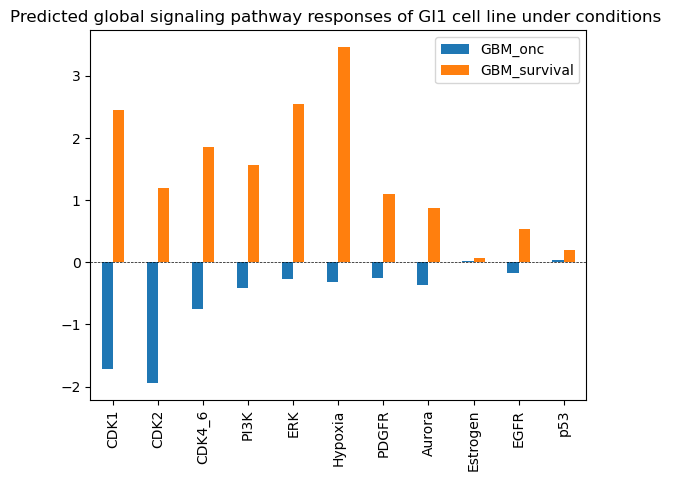

In [25]:
t_df_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title("Predicted global signaling pathway responses of GI1 cell line under conditions ")

In [26]:
rm_filt

,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,-1.000000,0.329009,0.238709,0.119077,0.098411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CDK2,0.427421,-1.000000,0.000000,0.000000,-0.099996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CDK4_6,0.361828,0.000000,-1.000000,0.143903,0.128459,0.000000,0.204769,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PI3K,0.000000,0.537612,0.292801,-1.000000,0.184181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ERK,0.452950,0.000000,0.000000,0.127905,-1.000000,0.000000,0.256808,0.288500,0.000000,0.000000,0.179235,0.0,0.0
Hypoxia,0.000000,0.000000,0.000000,0.176556,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PDGFR,0.000000,-0.413688,0.401043,0.000000,0.144317,0.000000,-1.000000,0.000000,0.000000,0.250223,-0.229628,0.0,0.0
Aurora,0.000000,0.000000,0.288569,0.000000,0.234815,0.000000,0.000000,-1.000000,0.000000,0.264546,0.000000,0.0,0.0
Estrogen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082634,0.000000,-1.000000,0.000000,0.000000,0.0,0.0
EGFR,0.228493,0.000000,0.000000,0.000000,0.000000,0.000000,0.179475,0.177012,0.000000,-1.000000,0.000000,0.0,0.0


In [27]:
display(rm_filt)
rm_subset=rm_filt[['CDK1', 'CDK2', 'CDK4_6', 'PI3K', 'ERK', 'Hypoxia', 'PDGFR', 'Aurora','Estrogen', 'EGFR', 'p53']]

,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53,GBM_onc,GBM_survival
CDK1,-1.000000,0.329009,0.238709,0.119077,0.098411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CDK2,0.427421,-1.000000,0.000000,0.000000,-0.099996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
CDK4_6,0.361828,0.000000,-1.000000,0.143903,0.128459,0.000000,0.204769,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PI3K,0.000000,0.537612,0.292801,-1.000000,0.184181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ERK,0.452950,0.000000,0.000000,0.127905,-1.000000,0.000000,0.256808,0.288500,0.000000,0.000000,0.179235,0.0,0.0
Hypoxia,0.000000,0.000000,0.000000,0.176556,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
PDGFR,0.000000,-0.413688,0.401043,0.000000,0.144317,0.000000,-1.000000,0.000000,0.000000,0.250223,-0.229628,0.0,0.0
Aurora,0.000000,0.000000,0.288569,0.000000,0.234815,0.000000,0.000000,-1.000000,0.000000,0.264546,0.000000,0.0,0.0
Estrogen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082634,0.000000,-1.000000,0.000000,0.000000,0.0,0.0
EGFR,0.228493,0.000000,0.000000,0.000000,0.000000,0.000000,0.179475,0.177012,0.000000,-1.000000,0.000000,0.0,0.0


In [28]:
rm_subset

,CDK1,CDK2,CDK4_6,PI3K,ERK,Hypoxia,PDGFR,Aurora,Estrogen,EGFR,p53
CDK1,-1.000000,0.329009,0.238709,0.119077,0.098411,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CDK2,0.427421,-1.000000,0.000000,0.000000,-0.099996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
CDK4_6,0.361828,0.000000,-1.000000,0.143903,0.128459,0.000000,0.204769,0.000000,0.000000,0.000000,0.000000
PI3K,0.000000,0.537612,0.292801,-1.000000,0.184181,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ERK,0.452950,0.000000,0.000000,0.127905,-1.000000,0.000000,0.256808,0.288500,0.000000,0.000000,0.179235
Hypoxia,0.000000,0.000000,0.000000,0.176556,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
PDGFR,0.000000,-0.413688,0.401043,0.000000,0.144317,0.000000,-1.000000,0.000000,0.000000,0.250223,-0.229628
Aurora,0.000000,0.000000,0.288569,0.000000,0.234815,0.000000,0.000000,-1.000000,0.000000,0.264546,0.000000
Estrogen,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.082634,0.000000,-1.000000,0.000000,0.000000
EGFR,0.228493,0.000000,0.000000,0.000000,0.000000,0.000000,0.179475,0.177012,0.000000,-1.000000,0.000000


In [29]:
rm_subset=rm_subset.loc[['GBM_onc','GBM_survival']]
rm_subset=rm_subset.T
display(rm_subset)

,GBM_onc,GBM_survival
CDK1,-0.462033,0.000000
CDK2,-1.259327,0.000000
CDK4_6,0.000000,0.000000
PI3K,0.000000,0.000000
ERK,0.000000,1.507447
Hypoxia,-0.293371,3.431996
PDGFR,0.000000,0.000000
Aurora,-0.237489,0.000000
Estrogen,0.000000,0.000000
EGFR,0.000000,0.000000


Text(0.5, 1.0, 'Predicted local signaling pathway responses of GI1 cell line under conditions ')

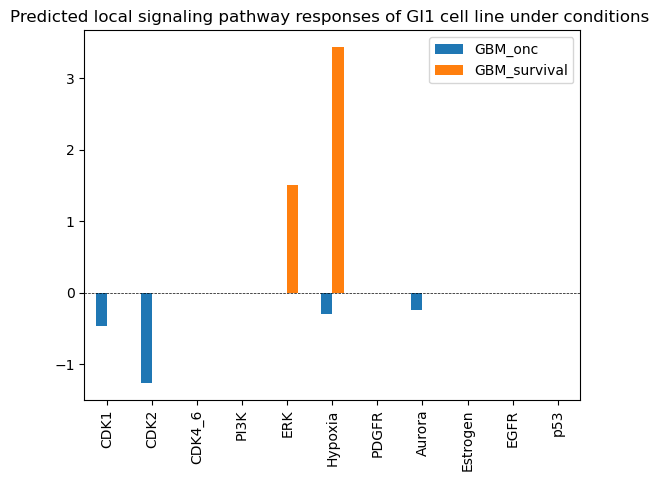

In [30]:
rm_subset.plot.bar()
plt.axhline(y=0, linestyle='--', color='black',linewidth=0.5)
plt.title("Predicted local signaling pathway responses of GI1 cell line under conditions ")